In [84]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from minimal import * 

In [85]:
gm3 = eos(g_sigma_N = 8.784820, g_omega_N = 8.720086, g_rho_N = 8.544795, g_phi_N = 0.0, b = 0.008628, c = -0.002433,\
             g_sigma_H = 5.408849, g_omega_H = 5.813391, g_rho_H = 0.0, g_phi_H = -4.110688)

baryon_list = [Neutron, Proton, Lambda] 
meson_list = [sigma, omega, rho, phi] 
lepton_list = [electron]

init_system(gm3, meson_list, baryon_list)

In [86]:
data = pd.read_csv(r'/Users/vinhtran/Downloads/datafile_gm3.txt', sep=" ", header=0,\
                       names = ['nb/n0', 'P', 'E', 'Sigma', 'Rho','Omega', 'Phi', 'xn', 'xp',\
                            'xe', 'xL', 'fermi_n', 'fermi_p', 'fermi_e', 'fermi_L', 'nan'])
data

,nb/n0,P,E,Sigma,Rho,Omega,Phi,xn,xp,xe,xL,fermi_n,fermi_p,fermi_e,fermi_L,nan
0,0.28,0.070686,40.349774,8.198005,-2.328705,4.681230,-0.000000,0.990944,0.009056,0.009056,0.000000,212.949950,44.522679,44.522679,0.000000,NaN
1,0.29,0.080052,41.793525,8.453906,-2.409592,4.848417,-0.000000,0.990479,0.009521,0.009521,0.000000,215.421820,45.803502,45.803502,0.000000,NaN
2,0.30,0.090248,43.237612,8.707875,-2.490287,5.015604,-0.000000,0.990008,0.009992,0.009992,0.000000,217.835457,47.075844,47.075844,0.000000,NaN
3,0.31,0.101300,44.682054,8.959955,-2.570788,5.182791,-0.000000,0.989530,0.010470,0.010470,0.000000,220.194014,48.339953,48.339953,0.000000,NaN
4,0.32,0.113235,46.126866,9.210186,-2.651092,5.349977,-0.000000,0.989046,0.010954,0.010954,0.000000,222.500376,49.596057,49.596057,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,7.96,424.462572,1518.141189,76.157712,-19.387450,110.614440,-18.722709,0.390550,0.103000,0.103000,0.506450,476.509635,305.580406,305.580406,519.627154,NaN
769,7.97,425.578051,1520.582346,76.195184,-19.389709,110.732982,-18.763248,0.390156,0.102934,0.102934,0.506910,476.548918,305.642795,305.642795,520.001921,NaN
770,7.98,426.695085,1523.024904,76.232608,-19.391960,110.851508,-18.803800,0.389763,0.102868,0.102868,0.507369,476.588102,305.705038,305.705038,520.376269,NaN
771,7.99,427.813675,1525.468863,76.269983,-19.394204,110.970019,-18.844365,0.389371,0.102802,0.102802,0.507827,476.627187,305.767137,305.767137,520.750198,NaN


In [87]:
nb_array = data.loc[:,'nb/n0'].values
P_array = data.loc[:,'P'].values
E_array = data.loc[:,'E'].values
sigma_array = data.loc[:,'Sigma'].values
rho_array = data.loc[:,'Rho'].values
omega_array = data.loc[:,'Omega'].values
phi_array = data.loc[:,'Phi'].values

neutron_frac = data.loc[:, 'xn'].values
proton_frac = data.loc[:, 'xp'].values
electron_frac = data.loc[:, 'xe'].values
lambda_frac = data.loc[:, 'xL'].values

fermi_n = data.loc[:, 'fermi_n'].values
fermi_p = data.loc[:, 'fermi_p'].values
fermi_e = data.loc[:, 'fermi_e'].values
fermi_L = data.loc[:, 'fermi_L'].values

In [5]:
baryon_list = [Neutron, Proton, Lambda] 
meson_list = [sigma, omega, rho, phi] 
lepton_list = [electron]

In [6]:
def U(sigma_field):
    term1 = (1/3) * gm3.b * Neutron.num_mass * (gm3.g_sigma_N * sigma_field)**3 
    term2 = (1/4) * gm3.c * (gm3.g_sigma_N * sigma_field)**4
    return term1 + term2 

In [7]:
def meson_eng_den(meson, meson_field):
    return 1/2 * meson.num_mass**2 * meson_field**2 

In [8]:
def baryon_eff_mass(baryon, sigma_field):
    if (baryon.kind == 'Nucleon'):
        return baryon.num_mass - gm3.g_sigma_N * sigma_field 
    elif (baryon.kind == 'Hyperon'):
        return baryon.num_mass - gm3.g_sigma_H * sigma_field 

def baryon_eff_eng(baryon, kf, sigma_field):
    return np.sqrt(kf**2 + baryon_eff_mass(baryon, sigma_field)**2)

### Expression for Baryon Energy Density
$$
    \epsilon_B = \frac{1}{4\pi^2} 
    \left[k_{F_B} E_{F_B}^3 - \frac{1}{2} m_*^2 k_{F_B} E_{F_B} - \frac{1}{2} m_*^4 \ln \frac{E_{F_B} + k_{F_B}}{m_*} \right] 
$$

In [9]:
def baryon_eng_den(baryon, kf, sigma_field):
    term1 = kf * baryon_eff_eng(baryon, kf, sigma_field)**3 
    term2 = -1/2 * baryon_eff_mass(baryon, sigma_field)**2 * kf * baryon_eff_eng(baryon, kf, sigma_field)
    term3 = -1/2 * baryon_eff_mass(baryon, sigma_field)**4 * np.log((baryon_eff_eng(baryon, kf, sigma_field) + kf)/baryon_eff_mass(baryon, sigma_field))
    return 1/(4*np.pi**2)*(term1 + term2 + term3)

In [19]:
def lepton_eng_den(lepton, kf):
    term1 = kf * np.sqrt(kf**2 + lepton.num_mass**2) 
    term2 = -1/2 * lepton.num_mass**2 * kf * np.sqrt(kf**2 + lepton.num_mass**2) 
    term3 = -1/2 * lepton.num_mass**4 * np.log((kf + np.sqrt(kf**2 + lepton.num_mass**2))/lepton.num_mass)
    return 1/(4*np.pi**2)*(term1 + term2 + term3)

### Expression 2  

$$
    \epsilon_B = \frac{1}{4\pi^2} 
    \left[k_{F_B}^3 E_F + \frac{1}{2} m_*^2 k_{F_B}E_{F_B} - \frac{1}{2} m_*^4 \ln \frac{k_{F_B} + E_{F_B}}{m_*}\right] 
$$

They end up being equivalent. 

In [30]:
def baryon_eng_den2(baryon, kf, sigma_field):
    term1 = kf**3 * baryon_eff_eng(baryon, kf, sigma_field)
    term2 = (1/2) * baryon_eff_mass(baryon, sigma_field)**2 * kf * baryon_eff_eng(baryon, kf, sigma_field)
    term3 = -(1/2) * baryon_eff_mass(baryon, sigma_field)**4 * np.log((baryon_eff_eng(baryon, kf, sigma_field) + kf)/baryon_eff_mass(baryon, sigma_field))
    return 1/(4*np.pi**2)*(term1 + term2 + term3)

In [39]:
energy_density_array = np.zeros(len(nb_array))

for i in range(len(nb_array)):
    energy_density_array[i] += U(sigma_array[i]) 
    energy_density_array[i] += meson_eng_den(sigma, sigma_array[i]) + meson_eng_den(omega, omega_array[i])\
                                + meson_eng_den(rho, rho_array[i]) + meson_eng_den(phi, phi_array[i])
    energy_density_array[i] += baryon_eng_den2(Neutron, fermi_n[i], sigma_array[i]) +\
                                baryon_eng_den2(Proton, fermi_p[i], sigma_array[i]) +\
                                    baryon_eng_den2(Lambda, fermi_L[i], sigma_array[i])
    energy_density_array[i] += lepton_eng_den(electron, fermi_e[i])
    energy_density_array[i] = energy_density_array[i]/197.296**3

In [40]:
energy_density_array

array([  40.35154207,   41.79426331,   43.23719689,   44.68035486,
         46.1237481 ,   47.56738913,   49.01128784,   50.45545611,
         51.89990325,   53.34464107,   54.78967979,   56.23502837,
         57.68069722,   59.12669571,   60.57303325,   62.01971986,
         63.46676405,   64.9141746 ,   66.3619599 ,   67.81012971,
         69.25869181,   70.70765399,   72.15702484,   73.60681148,
         75.05702369,   76.50766627,   77.95874972,   79.41027902,
         80.8622619 ,   82.31470743,   83.76762055,   85.2210091 ,
         86.67487824,   88.12923734,   89.58409178,   91.03944868,
         92.49531311,   93.95169195,   95.40859155,   96.86601887,
         98.32397956,   99.78247925,  101.24152296,  102.70111907,
        104.16127158,  105.62198731,  107.08327076,  108.54512738,
        110.00756496,  111.47058672,  112.93420005,  114.39840835,
        115.86321765,  117.32863455,  118.79466261,  120.26130985,
        121.72857693,  123.19647379,  124.66500214,  126.13416

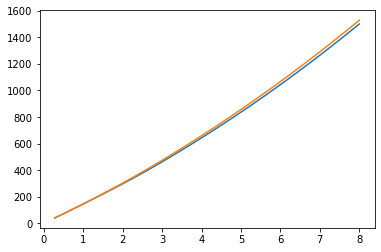

In [14]:
plt.plot(nb_array, energy_density_array)
plt.plot(nb_array, E_array)

## So we see that the energy densities match. So the pressures should match as well. 
1. Then we can move onto the next step where we use Sympy to write out an analytic expression for the pressure in terms of $n_B$ and then we can take the partial derivative. 
2. From Glen-Denning, we have
$$
    P = - U(\sigma) 
    - 
    \frac{1}{2}m_\sigma^2 \sigma^2 + 
    \frac{1}{2} m_\omega^2 \omega^2 + 
    \frac{1}{2} m_\rho^2\rho^2 
    + 
    \frac{1}{3\pi^2} \sum_B 
    \frac{1}{4}
    \left[k_F^3E_F - \frac{3}{2} m_*^2 E_F + \frac{3}{2} m_*^4 \ln\frac{k_F + E_F}{m_*}\right]
    + 
    \frac{1}{3\pi^2}\sum_\ell 
     \frac{1}{4}
    \left[k_F^3E_F - \frac{3}{2} m^2 E_F + \frac{3}{2} m^4 \ln\frac{k_F + E_F}{m}\right]
$$
Immediate problem we run into is that we want to find $\partial \sigma/\partial n_B$ which again involves some sketchy math. The more major sketchy thing unfortunately is that this is highly coupled. 

## Sigma Partial Derivative
$$
    \frac{\partial \sigma}{\partial n_B} = 
    \frac{\sum_i g_{\sigma i}\beta_i}{m_\sigma^2 + \frac{\partial^2 U}{\partial \sigma^2} - \sum_i g_{\sigma_i} \alpha_i}
$$
with
$$
    \alpha_i = 
       - \frac{g_{\sigma i}}{2\pi^2} \left(k_{F_i} E_{F_i} - {m_i^*}^2 \ln \frac{k_{F_i} + E_{F_i}}{m_i^*}\right)
    + \frac{m_i^*}{2\pi^2} \left[k_{F_i}
    \left(-\frac{g_{\sigma i} m_i^*}{E_{F_i}}\right)
    +
    2m_i^* g_{\sigma i}\ln \frac{k_{F_i} + E_{F_i}}{m_i^*}
    - {m_i^*}^2 \frac{g_{\sigma i}}{m_i^*}
    \right]
$$
and
$$
    \beta_i = 
    \frac{m_i^*}{2\pi^2} 
    \left[
    \frac{\pi^2 x_i}{k_{F_i}}E_{F_i} 
    + k_{F_i}\frac{\pi^2 x_i}{k_{F_i}E_{F_i}}
    - {m_i^*}^2 \frac{\pi^2 x_i}{k_{F_i}^2 E_{F_i}}
    \right] 
$$

In [26]:
def second_deriv_U(sigma_field):
    term1 = 2 * sigma.num_b * Neutron.num_mass * Neutron.num_g_sigma**3 * sigma_field 
    term2 = 3 * sigma.num_c * Neutron.num_g_sigma **4 * sigma_field**2 
    return term1 + term2 

In [24]:
def beta(baryon, kf, sigma_field, baryon_frac):
    m = mass_eff(baryon, sigma_field)
    EF = baryon_energy_density(baryon, kf, sigma_field)
    xi = baryon_frac 
    pi = np.pi 
    
    term1 = EF/kf
    term2 = 1/EF
    term3 = -m**2 / kf**2 /EF
    
    return m * xi/2 *(term1 + term2 + term3)

In [38]:
def alpha(baryon, kf, sigma_field, baryon_frac):
    m = mass_eff(baryon, sigma_field)
    EF = baryon_energy_density(baryon, kf, sigma_field)
    xi = baryon_frac 
    pi = np.pi
    g_sigma = baryon.num_g_sigma 
    log_factor = log_fac(baryon, kf, sigma_field) 
    
    term1_a = kf*EF 
    term1_b = -m**2 * log_factor 
    term1 = term1_a + term1_b 
    
    term2_a = - g_sigma * m *kf /EF 
    term2_b = 2*m*g_sigma * log_factor 
    term2_c = - m * g_sigma 
    term2 = term2_a + term2_b + term2_c
    
    return -g_sigma/(2*pi**2) * term1 + m/(2*pi**2) * term2 

In [36]:
def partial_sigma(Proton, Neutron, Lambda,\
                  Proton_kf, Neutron_kf, Lambda_kf,\
                  Proton_frac, Neutron_frac, Lambda_frac,\
                  sigma_field):
    
    if (Lambda_kf == 0.0):
        numerator = Proton.num_g_sigma * beta(Proton, Proton_kf, sigma_field, Proton_frac)\
                + Neutron.num_g_sigma * beta(Neutron, Neutron_kf, sigma_field, Neutron_frac)\
                
    elif (Lambda_kf != 0.0):
        numerator = Proton.num_g_sigma * beta(Proton, Proton_kf, sigma_field, Proton_frac)\
                + Neutron.num_g_sigma * beta(Neutron, Neutron_kf, sigma_field, Neutron_frac)\
                + Lambda.num_g_sigma * beta(Lambda, Lambda_kf, sigma_field, Lambda_frac)
    
    denominator = second_deriv_U(sigma_field) + sigma.num_mass**2
    
    if (Lambda_kf == 0.0):
        denominator = denominator +\
            Proton.num_g_sigma * alpha(Proton, Proton_kf, sigma_field, Proton_frac)\
                + Neutron.num_g_sigma * alpha(Neutron, Neutron_kf, sigma_field, Neutron_frac)
    
    elif (Lambda_kf != 0.0):
        denominator = denominator +\
                Proton.num_g_sigma * alpha(Proton, Proton_kf, sigma_field, Proton_frac)\
                + Neutron.num_g_sigma * alpha(Neutron, Neutron_kf, sigma_field, Neutron_frac)\
                + Lambda.num_g_sigma * alpha(Lambda, Lambda_kf, sigma_field, Lambda_frac)
    
    return numerator/denominator 

### Lepton Contribution
$$
    \frac{\partial P_\ell}{\partial n_B} 
     = 
      \frac{1}{12} \sum_\ell x_\ell 
    \left[\frac{3E_{F_\ell}^2 + k_{F_\ell}^2}{E_{F_\ell}} 
    +
    \frac{3 m_\ell^2}{2 k_{F_\ell}E_{F_\ell}} 
    \left(\frac{m_\ell^2}{k_{F_\ell}} - 1\right) 
    \right]
$$

In [58]:
def lepton_energy_density(lepton, kf):
    return np.sqrt(lepton.num_mass**2 + kf**2)

In [56]:
def partial_P_lepton(lepton, kf, lepton_frac):
    # partial derivative of lepton pressure with respect to nb 
    
    EF = lepton_energy_density(lepton, kf)
    m = lepton.num_mass
    term1 = (3*EF**2 + kf**2)/EF
    term2 = 3*m**2/(2*kf*EF)*(m**2/kf - 1)
    
    return 1/12*lepton_frac *(term1 + term2)

### Baryon Contribution

In [5]:
def mass_eff(baryon, sigma_field):
    return baryon.num_mass - baryon.num_g_sigma * sigma_field 

In [8]:
def baryon_energy_density(baryon, kf, sigma_field):
    m = mass_eff(baryon, sigma_field)
    return np.sqrt(kf**2 + m**2)

In [12]:
def log_fac(baryon, kf, sigma_field):
    numerator = kf + baryon_energy_density(baryon, kf, sigma_field) 
    denominator = mass_eff(baryon, sigma_field)
    return np.log(numerator/denominator)

In [54]:
def partial_P_baryon(baryon, kf, sigma_field, dsig, baryon_frac):
    
    # loading everything here at once 
    # dsig = partial_sigma(nb)
    g_sigma = baryon.num_g_sigma
    pi = np.pi 
    xB = baryon_frac 
    EF = baryon_energy_density(baryon, kf, sigma_field) 
    m = mass_eff(baryon, sigma_field)
    log_factor = log_fac(baryon, kf, sigma_field)
    
    term1 = 3*pi**2 * xB * EF
    
    term2_a = pi**2 * xB/kf/EF
    term2_b = - g_sigma * m/EF* dsig
    term2 = kf**3*(term2_a + term2_b) 
    
    term3_a = -2*m*g_sigma*dsig*EF 
    term3_b = m**2*pi**2*xB/kf/EF
    term3_c = -m**2*g_sigma*m/EF*dsig 
    term3 = -3/2*(term3_a + term3_b + term3_c)
    
    term4_a = -4 * g_sigma * m**3 * dsig * log_factor
    term4_b = m**4 * pi**2 * xB/kf**2 / EF 
    term4_c = m**4 * g_sigma * dsig / m 
    term4 = 3/2*(term4_a + term4_b + term4_c)
    
    return 1/(12*pi**2)*(term1 + term2 + term3 + term4) 

### Other Contributions

In [44]:
def partial_U(sigma_field, partial_sigma):
    term1 = sigma.num_b * Neutron.num_mass * Neutron.num_g_sigma**3 * sigma_field**2 
    term2 = sigma.num_c * Neutron.num_g_sigma**4 * sigma_field**3
    return (term1 + term2)*partial_sigma

In [43]:
def partial_P_sigma(sigma_field, partial_sigma):
    # returns the contribution to the pressure due to the presence of the 
    # sigma meson 
    return - sigma.num_mass**2 * sigma_field * partial_sigma

In [19]:
def partial_P_omega(proton_frac, neutron_frac, lambda_frac):
    proton_term = Proton.num_g_omega * proton_frac 
    neutron_term = Neutron.num_g_omega * neutron_frac 
    lambda_term = Lambda.num_g_omega * lambda_frac 
    return 1/omega.num_mass**2 * (proton_term + neutron_term + lambda_term)

In [21]:
def partial_P_rho(proton_frac, neutron_frac):
    proton_term = Proton.num_g_rho * Proton.isospin * proton_frac 
    neutron_term = Neutron.num_g_rho * Neutron.isospin * neutron_frac 
    return 1/rho.num_mass**2 * (proton_term + neutron_term)

In [23]:
def partial_P_phi(proton_frac, neutron_frac, lambda_frac):
    proton_term = Proton.num_g_phi * proton_frac
    neutron_term = Neutron.num_g_phi * neutron_frac 
    lambda_term = Lambda.num_g_omega * lambda_frac
    return 1/phi.num_mass**2 * (proton_term + neutron_term + lambda_term)

## Calculating the Adiabatic Sound Speed
1. Find $\partial \sigma/\partial n_B$ and store values for each $n_B$ in an array. Pass to the other things. 
2. Calculate Neutron chemical potential. Store values in an array. Pass to other things. 
3. Calculate partial derivative of the pressure. 

In [39]:
partial_sigma_array = np.zeros(len(nb_array))

for i in range(len(partial_sigma_array)):
    partial_sigma_array[i] = partial_sigma(Proton, Neutron, Lambda,\
                  fermi_p[i], fermi_n[i], fermi_L[i],\
                  proton_frac[i], neutron_frac[i], lambda_frac[i],\
                  sigma_array[i])

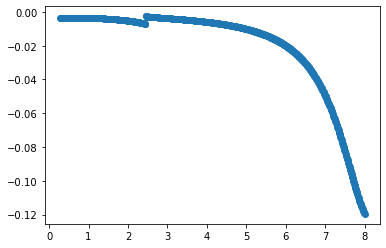

In [42]:
plt.scatter(nb_array, partial_sigma_array)

In [49]:
def partial_P_nB(sigma_field, partial_sigma,\
                proton_frac, neutron_frac, lambda_frac, electron_frac,\
                proton_kf, neutron_kf, lambda_kf, electron_kf\
                ):
    
    # sigma self interaction 
    result = partial_U(sigma_field, partial_sigma) 
    
    # add meson contribution
    result += partial_P_sigma(sigma_field, partial_sigma)
    result += partial_P_omega(proton_frac, neutron_frac, lambda_frac)
    result += partial_P_rho(proton_frac, neutron_frac)
    result += partial_P_phi(proton_frac, neutron_frac, lambda_frac)
    
    # add baryon contribution
    result += partial_P_baryon(Proton, proton_kf, sigma_field, partial_sigma\
                               ,proton_frac)
    result += partial_P_baryon(Neutron, neutron_kf, sigma_field, partial_sigma\
                               ,neutron_frac)
    if (lambda_kf != 0.0):
        result += partial_P_baryon(Lambda, lambda_kf, sigma_field, partial_sigma\
                               ,lambda_frac)
    
    # add lepton contribution
    result += partial_P_lepton(electron, electron_kf, electron_frac)
    
    return result 

In [59]:
partial_P_nB_array = np.zeros(len(nb_array))

for i in range(len(partial_P_nB_array)):
    partial_P_nB_array[i] = partial_P_nB(sigma_array[i], partial_sigma_array[i],\
                                        proton_frac[i], neutron_frac[i], lambda_frac[i], electron_frac[i],\
                                        fermi_p[i], fermi_n[i], fermi_L[i], fermi_e[i])

In [117]:
partial_P_nB_array

array([-2.00365116e+05, -1.92283755e+05, -1.84512328e+05, -1.77029320e+05,
       -1.69814288e+05, -1.62849327e+05, -1.56118693e+05, -1.49606736e+05,
       -1.43300914e+05, -1.37187777e+05, -1.31257304e+05, -1.25498131e+05,
       -1.19901497e+05, -1.14458077e+05, -1.09160431e+05, -1.04000538e+05,
       -9.89717700e+04, -9.40674787e+04, -8.92817106e+04, -8.46091169e+04,
       -8.00440987e+04, -7.55820085e+04, -7.12184543e+04, -6.69486915e+04,
       -6.27691665e+04, -5.86756944e+04, -5.46649962e+04, -5.07336053e+04,
       -4.68784536e+04, -4.30963703e+04, -3.93846372e+04, -3.57404931e+04,
       -3.21615539e+04, -2.86452695e+04, -2.51893716e+04, -2.17917300e+04,
       -1.84502348e+04, -1.51629218e+04, -1.19279093e+04, -8.74341423e+03,
       -5.60771707e+03, -2.51917682e+03,  5.23770229e+02,  3.52262365e+03,
        6.47881643e+03,  9.39371172e+03,  1.22686480e+04,  1.51048747e+04,
        1.79036330e+04,  2.06660359e+04,  2.33932763e+04,  2.60863997e+04,
        2.87464554e+04,  

In [62]:
def neutron_chem_pot(kf, sigma_field, omega_field, rho_field):
    term1 = np.sqrt(kf**2 + mass_eff(Neutron, sigma_field))
    term2 = Neutron.num_g_omega * omega_field 
    term3 = Neutron.num_g_rho * Neutron.isospin * rho_field 
    return term1 + term2 + term3

In [63]:
neutron_chem_pot_array = np.zeros(len(nb_array))
for i in range(len(neutron_chem_pot_array)):
    neutron_chem_pot_array[i] = neutron_chem_pot(fermi_n[i], sigma_array[i], omega_array[i], rho_array[i])

In [65]:
def adiabatic_sound_speed(neutron_chem_pot, partial_P_nb):
    return 1/neutron_chem_pot * partial_P_nb

In [118]:
def adiabatic_sound_speed_2(nb, energy_density, pressure, partial_P_nb):
    return nb/(energy_density + pressure) * partial_P_nb

In [129]:
adiabatic_array = np.zeros(len(nb_array))
for i in range(len(adiabatic_array)):
    adiabatic_array[i] = adiabatic_sound_speed(neutron_chem_pot_array[i], partial_P_nB_array[i])
    
adiabatic_array_2 = np.zeros(len(nb_array))
for i in range(len(adiabatic_array)):
    adiabatic_array_2[i] = adiabatic_sound_speed_2(nb_array[i], E_array[i], P_array[i], partial_P_nB_array[i])

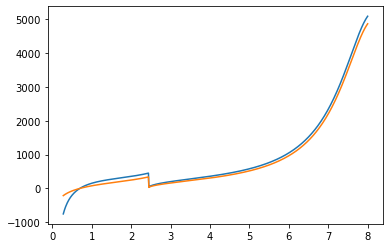

In [134]:
plt.plot(nb_array, adiabatic_array)
plt.plot(nb_array, adiabatic_array_2*0.153)

### Things to figure out
1. Read over the code again to see if there's any issues in the logic.
2. Look again at the units. Off by a factor of 100? 
3. check the equilibrium sound speed. 
4. Check units of pressure and energy density. Make sure units match up throughout each term! Ie, field terms versus baryon/lepton contribution and stuff. I think this is the problem. We have the pressure is equal to U but U contains a bunch of things... 

### Equation of motion for sigma
$$
    m_\sigma^2 + \frac{dU}{d\sigma} = \sum_i g_{\sigma i} n_i^s
$$

In [80]:
def mass_eff(baryon, sigma_field):
    return baryon.num_mass - baryon.num_g_sigma * sigma_field 

def baryon_energy_density(baryon, kf, sigma_field):
    m = mass_eff(baryon, sigma_field)
    return np.sqrt(kf**2 + m**2)

def log_fac(baryon, kf, sigma_field):
    numerator = kf + baryon_energy_density(baryon, kf, sigma_field) 
    denominator = mass_eff(baryon, sigma_field)
    return np.log(numerator/denominator)

In [81]:
def scalar_density(baryon, kf, sigma_field):
    m = mass_eff(baryon, sigma_field) 
    EF = baryon_energy_density(baryon, kf, sigma_field)
    log_factor = log_fac(baryon, kf, sigma_field)
    
    term1 = kf*EF
    term2 = -m**2 * log_factor 
    
    return m/(2*np.pi**2)*(term1 + term2)

In [82]:
def first_deriv_U(sigma_field):
    term1 = sigma.num_b * Neutron.num_mass * Neutron.num_g_sigma**3 * sigma_field**2 
    term2 = sigma.num_c * Neutron.num_g_sigma **4 * sigma_field**3
    return term1 + term2 

In [110]:
Neutron.num_g_sigma

8.78482

In [111]:
def left_hand_side(sigma_field):
    return sigma.num_mass**2 * sigma_field + first_deriv_U(sigma_field) 

In [112]:
lhs_array = np.zeros(len(nb_array)) 
rhs_array = np.zeros(len(nb_array)) 

for i in range(len(lhs_array)):
    lhs_array[i] = left_hand_side(sigma_array[i])/hc**3
    rhs_array[i] = (Proton.num_g_sigma * scalar_density(Proton, fermi_p[i], sigma_array[i])\
                        + Neutron.num_g_sigma * scalar_density(Neutron, fermi_n[i], sigma_array[i])\
                        + Lambda.num_g_sigma * scalar_density(Lambda, fermi_L[i], sigma_array[i]))/hc**3
    #rhs_array[i] = rhs_array[i]/hc**3
    #rhs_array[i] = Neutron.num_g_sigma * scalar_density(Neutron, fermi_n[i], sigma_array[i])

In [113]:
lhs_array

array([0.36974297, 0.38276298, 0.39577107, 0.4087673 , 0.42175168,
       0.4347243 , 0.44768512, 0.46063413, 0.47357142, 0.486497  ,
       0.49941082, 0.51231289, 0.52520335, 0.53808208, 0.55094911,
       0.56380447, 0.57664819, 0.58948021, 0.60230061, 0.61510929,
       0.62790636, 0.6406918 , 0.65346556, 0.66622766, 0.67897809,
       0.6917169 , 0.70444404, 0.71715948, 0.72986331, 0.74255544,
       0.75523582, 0.76790462, 0.78056167, 0.79320704, 0.80584069,
       0.81846263, 0.83107284, 0.84367128, 0.85625802, 0.86883294,
       0.88139617, 0.89394755, 0.90648719, 0.91901498, 0.93153099,
       0.94403515, 0.95652745, 0.96900791, 0.98147642, 0.9939331 ,
       1.00637787, 1.0188107 , 1.0312316 , 1.04364055, 1.05603748,
       1.06842245, 1.08079536, 1.09315629, 1.10550517, 1.11784197,
       1.13016664, 1.14247926, 1.15477971, 1.16706796, 1.17934413,
       1.19160808, 1.20385979, 1.21609929, 1.22832653, 1.24054146,
       1.25274413, 1.26493444, 1.27711239, 1.28927797, 1.30143

In [106]:
rhs_array

array([0.36974296, 0.38276295, 0.39577106, 0.4087673 , 0.4217517 ,
       0.4347243 , 0.4476851 , 0.46063414, 0.47357142, 0.48649697,
       0.4994108 , 0.51231291, 0.52520333, 0.53808205, 0.55094909,
       0.56380446, 0.57664816, 0.5894802 , 0.60230058, 0.6151093 ,
       0.62790637, 0.64069178, 0.65346554, 0.66622764, 0.6789781 ,
       0.69171688, 0.70444401, 0.71715948, 0.72986327, 0.7425554 ,
       0.75523584, 0.76790459, 0.78056165, 0.79320701, 0.80584066,
       0.8184626 , 0.8310728 , 0.84367127, 0.85625798, 0.86883295,
       0.88139614, 0.89394755, 0.90648716, 0.91901497, 0.93153096,
       0.94403511, 0.95652741, 0.96900786, 0.98147642, 0.99393309,
       1.00637785, 1.01881068, 1.03123157, 1.0436405 , 1.05603744,
       1.06842241, 1.08079535, 1.09315626, 1.10550511, 1.1178419 ,
       1.1301666 , 1.14247919, 1.15477965, 1.16706795, 1.17934408,
       1.19160803, 1.20385975, 1.21609924, 1.22832647, 1.24054141,
       1.25274405, 1.26493437, 1.27711233, 1.28927792, 1.30143

In [ ]:
## Attempt 2